In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
box = pd.read_csv('../Data/Reduced_dimensions2.csv', index_col=0, header = [0,1])
titles = pd.read_csv('../Data/boxoffice_titles.csv', index_col=0, header=0)
box.shape

(1983, 84)

## Finding the % of films who turn a profit, the average loss and average return on films

In [4]:
# creating a new dataframe of profits
profit = box['Numerical']
profit = profit[['budget', 'revenue']]
profit['profit'] = profit['revenue'] - profit['budget']
profit['profit_margin'] = (profit['profit']/profit['revenue'])*100
profit.head(3)

,budget,revenue,profit,profit_margin
0,40000000.0,134734481.0,94734481.0,70.311980
1,3300000.0,48982041.0,45682041.0,93.262837
2,8000000.0,3418605.0,-4581395.0,-134.013582


In [5]:
# Adding in titles to the profit dataframe for use in my written report & presentation
profit = profit.merge(titles, left_index=True, right_index=True, how='inner')
profit = profit[['title', 'budget', 'revenue', 'profit', 'profit_margin']]
profit.head(3)

,title,budget,revenue,profit,profit_margin
0,The Princess Diaries 2: Royal Engagement,40000000.0,134734481.0,94734481.0,70.311980
1,Whiplash,3300000.0,48982041.0,45682041.0,93.262837
2,Pinocchio and the Emperor of the Night,8000000.0,3418605.0,-4581395.0,-134.013582


In [6]:
# of films that turned a profit
len(profit[profit['profit']>0])/len(profit)*100

80.23197175995965

In [7]:
# Average profit margin & average profit
print('Mean profit margin: ', profit['profit_margin'].mean())
print('Mean profit: ', profit['profit'].mean())
print((profit['revenue'].sum() - profit['budget'].sum()))

Mean profit margin:  -211.87153015770005
Mean profit:  52575066.65557236
104256357178.0


In [8]:
profit[profit['profit_margin']<(-1000)].sort_values(by='budget', ascending=False)

,title,budget,revenue,profit,profit_margin
703,The Adventures of Pluto Nash,100000000.0,2683893.0,-97316107.0,-3625.930952
2012,Town & Country,90000000.0,3652318.0,-86347682.0,-2364.188496
1402,Monkeybone,75000000.0,2210366.0,-72789634.0,-3293.103224
2217,Isn't She Great,36000000.0,3003296.0,-32996704.0,-1098.683047
164,Supersonic,35000000.0,1422373.0,-33577627.0,-2360.676630
1804,French Connection II,35000000.0,1700350.0,-33299650.0,-1958.399741
172,Scarface,35000000.0,1308000.0,-33692000.0,-2575.840979
1481,Roadside Prophets,35000000.0,157645.0,-34842355.0,-22101.782486
1485,...And Justice for All,35000000.0,1582387.0,-33417613.0,-2111.848303
1496,Call of the Wild,35000000.0,270210.0,-34729790.0,-12852.888494


In [ ]:
worst_loss = profit[profit['profit_margin']<(-1000)].sort_values(by='budget', ascending=False)
print(worst)

In [9]:
mean_loss = profit['profit'][profit['profit']<0].mean()
mean_margin_loss = profit['profit_margin'][profit['profit']<0].mean()
print(mean_loss, mean_margin_loss)

-17967295.75765306 -1326.4244188582284


In [10]:
mean_profit = profit['profit'][profit['profit']>0].mean()
mean_profit_margin = profit['profit_margin'][profit['profit']>0].mean()
print(mean_profit, mean_profit_margin)

69955711.57448146 62.73860961012387


# Plotting budget v revenue

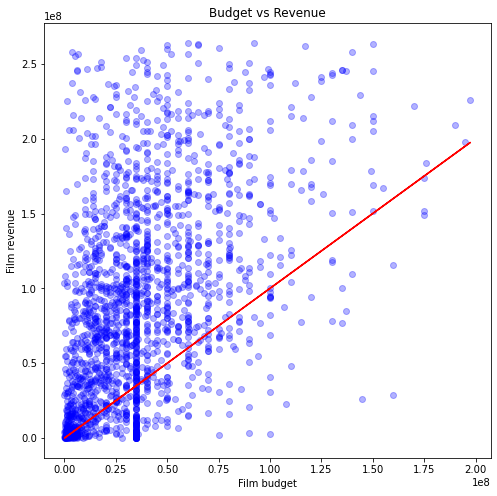

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(box['Numerical', 'budget'], box['Numerical', 'revenue'], color='blue', alpha=0.3)
plt.plot(box['Numerical', 'budget'], box['Numerical', 'budget'], color='r')
plt.title('Budget vs Revenue')
plt.xlabel('Film budget')
plt.ylabel('Film revenue');

# plotting runtime v revenue

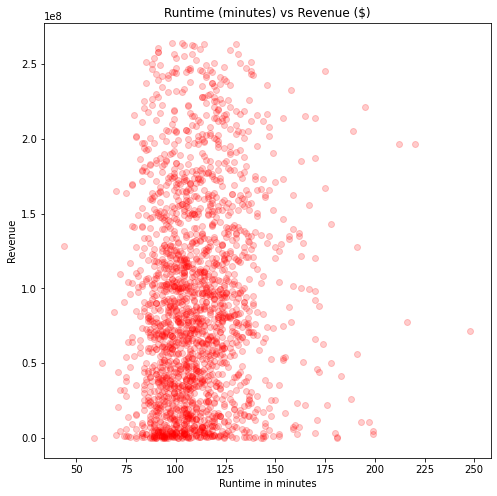

In [12]:
plt.figure(figsize=(8,8))
plt.scatter(box['Numerical', 'runtime'], box['Numerical', 'revenue'], color='red', alpha=0.2)
plt.title('Runtime (minutes) vs Revenue ($)')
plt.xlabel('Runtime in minutes')
plt.ylabel('Revenue');

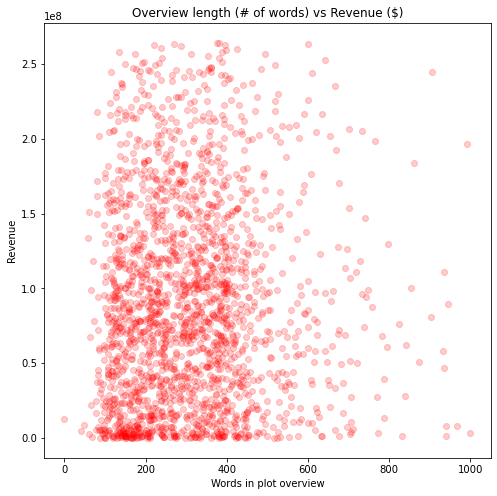

In [13]:
plt.figure(figsize=(8,8))
plt.scatter(box['Numerical', 'Overview_length'], box['Numerical', 'revenue'], color='red', alpha=0.2)
plt.title('Overview length (# of words) vs Revenue ($)')
plt.xlabel('Words in plot overview')
plt.ylabel('Revenue');